In [13]:
from vision import Vision
from globalPlanning import GlobalPlanning
from localPlanning import LocalPlanning
from thymioControl import ThymioControl
from kalman import Kalman
from plotter import Plotter

import numpy as np
import math
import time

In [14]:
vision = Vision()
globalPlanning = GlobalPlanning()
localPlanning = LocalPlanning()
thymio = ThymioControl()
plotter = Plotter()
filter = Kalman()

In [15]:
globalPlanning = GlobalPlanning()
matrix = np.zeros((20, 30))
matrix[1:6, 9:11] = -1; matrix[11, 1] = -1; matrix[10:17, 17:26] = -1
start = (1, 1)
goal = (19, 28)
plotter.set_map(matrix, start, goal)
if start == None:
    print("No start found")
elif goal == None:
    print("No goal found")
else:
    #path, matrix2 = globalPlanning.dijkstra(vision.get_matrix(), vision.get_start(), vision.get_goal)
    path, matrix2 = globalPlanning.dijkstra(matrix.copy(), start, goal)

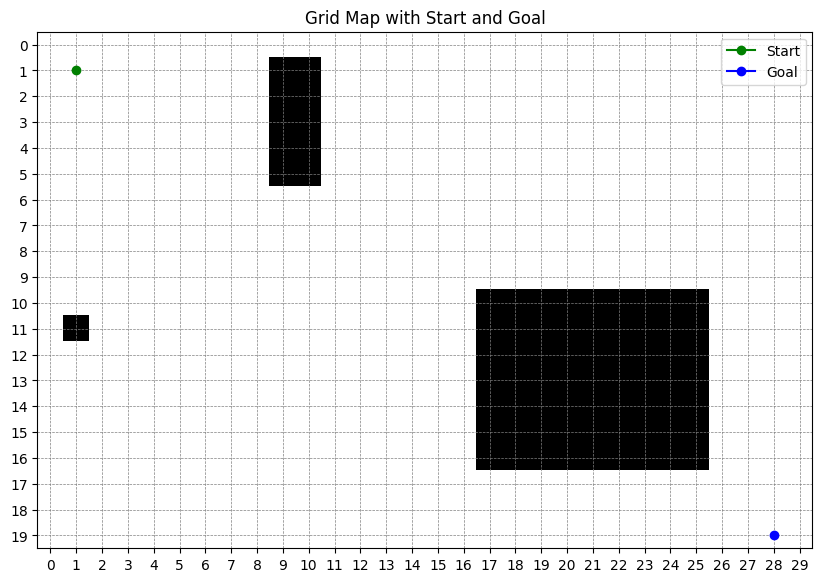

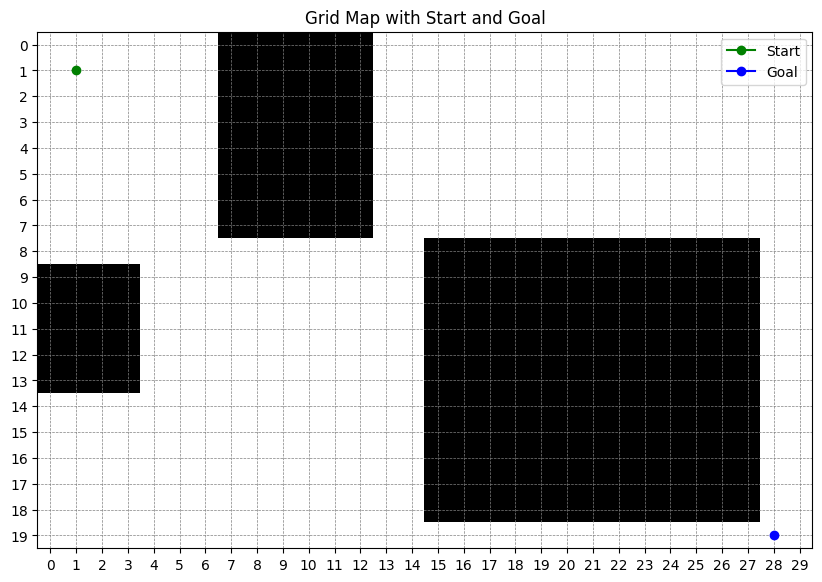

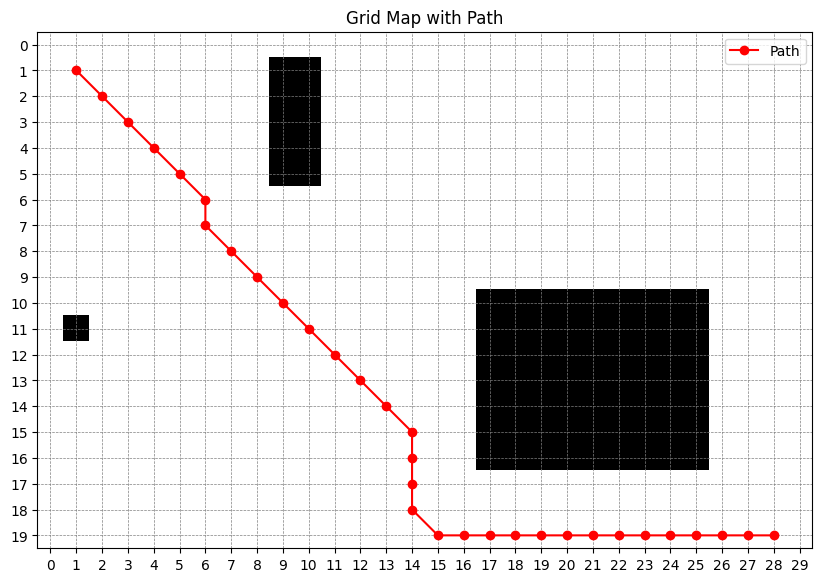

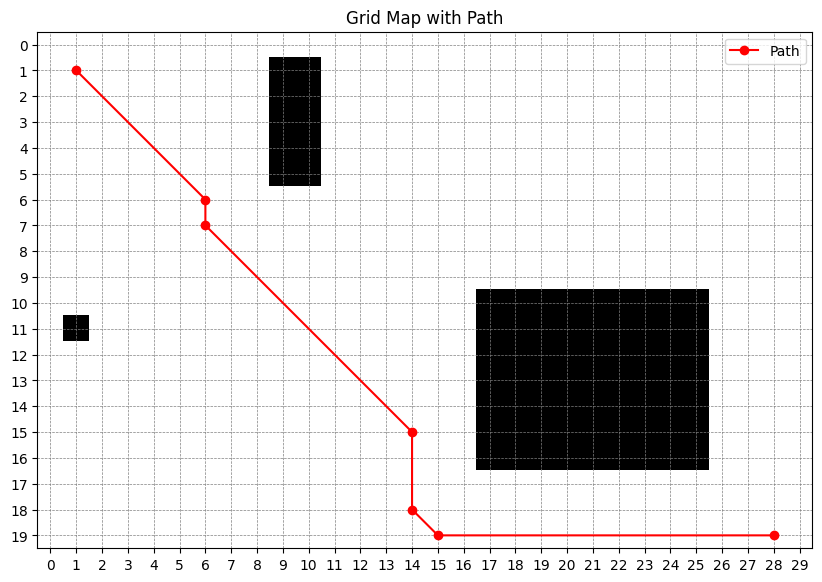

In [16]:
plotter.plot_map()
plotter.plot_map_given(matrix2, start, goal)
plotter.plot_path(path)
thymio.set_path(path.copy())
path2 = thymio.get_path_cells()
plotter.plot_path(path2)

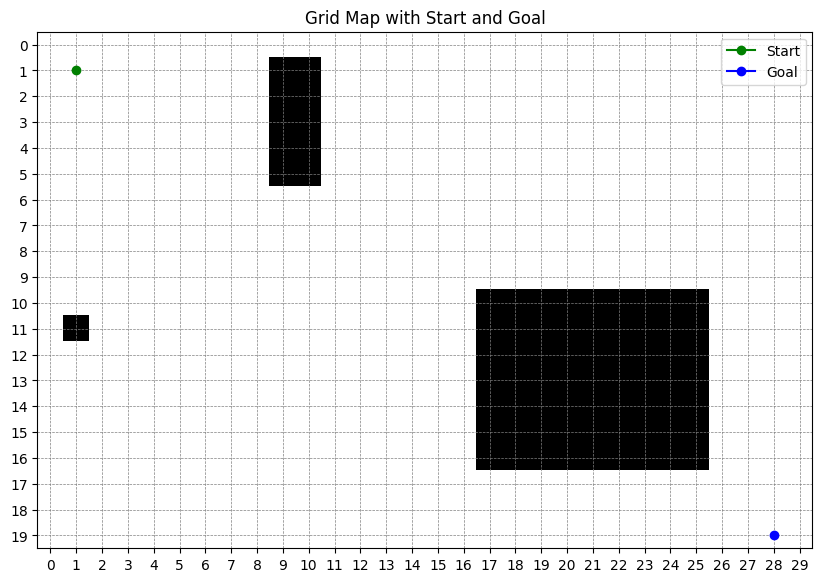

In [17]:
matrix = np.zeros((20, 30))
matrix[1:6, 9:11] = -1; matrix[11, 1] = -1; matrix[10:17, 17:26] = -1
start = (1, 1)
goal = (19, 28)
plotter.set_map(matrix, start, goal)

plotter.plot_map()

Position:  [1, 1]
position 0:  1
position 1:  1
First iteration
Computing path
Map shape:  (20, 30)


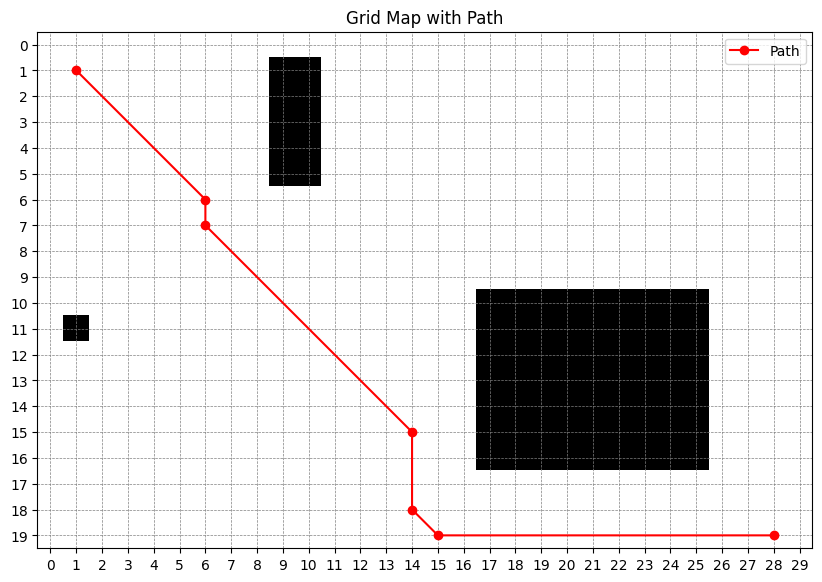

Kalman update:  (10.0, 10.0, 0.0)
Kalman position used:  [10.0, 10.0]
x_diff:  50.0  y_diff:  50.0  distance:  70.71067811865476
my angle:  0.0
waypoint angle:  0.7853981633974483
diff angle:  0.7853981633974483
angleDistance:  0.7853981633974483
Speed:  2.0 0.4319689898685966
Kalman prediction:  (0.0, 0.0, 0.0)
Trajectory:  [1.0] [1.0]


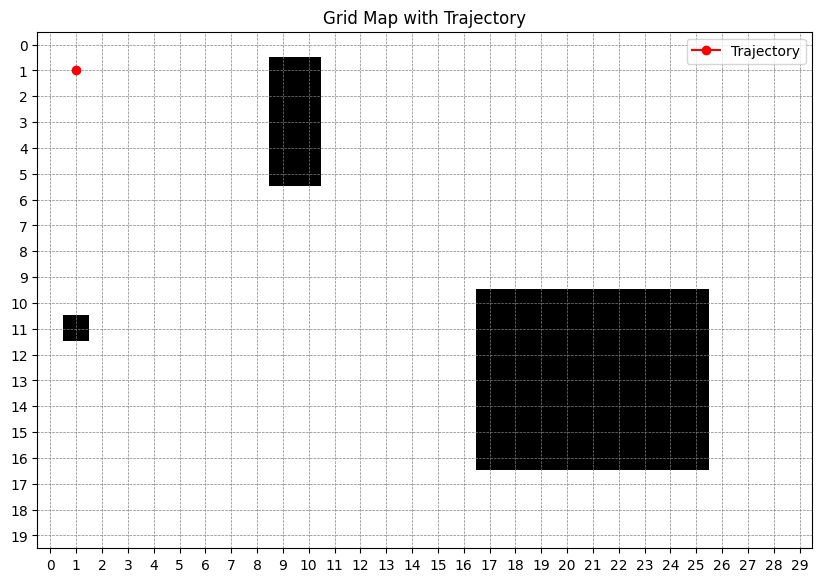

Position:  [0.7002098777964519, 1.0097159022578934]
position 0:  0.7002098777964519
position 1:  1.0097159022578934
Kalman update:  (5.501319160673127, 6.626260608567424, -6.113571214021285)
Kalman position used:  [5.501319160673127, 6.626260608567424]
x_diff:  54.49868083932687  y_diff:  53.37373939143258  distance:  76.28146740756483
my angle:  0.16961409315830167
waypoint angle:  0.7749700978352968
diff angle:  0.6053560046769951
angleDistance:  0.6053560046769952
Speed:  2.0 0.3329458025723474
Kalman prediction:  (0.0064790680718595514, 0.00686647811056643, -0.006211728518889962)
Trajectory:  [1.0, 0.7002098777964519] [1.0, 1.0097159022578934]


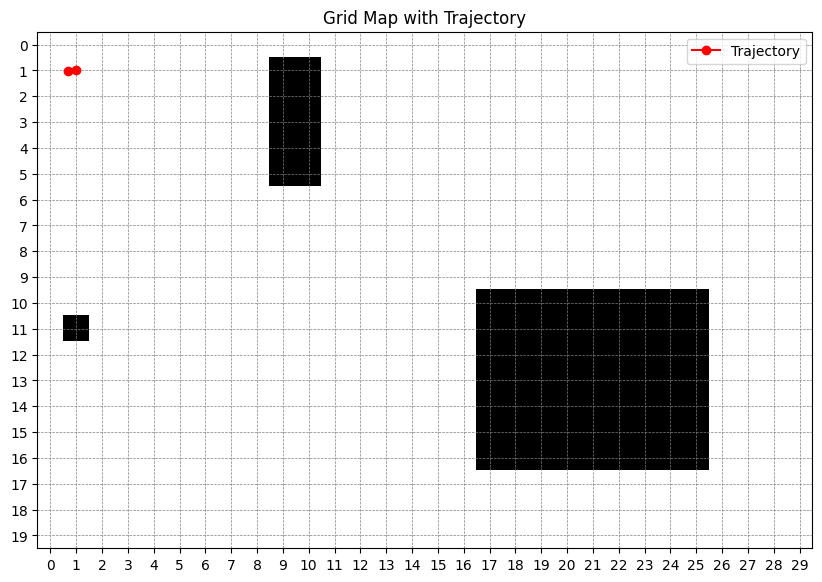

Position:  [0.2558241063050659, 0.7206278560013168]
position 0:  0.2558241063050659
position 1:  0.7206278560013168
Kalman update:  (2.1604709386550414, 4.588993487968908, -0.11775971374866007)
Kalman position used:  [2.1604709386550414, 4.588993487968908]
x_diff:  57.83952906134496  y_diff:  55.41100651203109  distance:  80.09863147841241
my angle:  6.1654255934309266
waypoint angle:  0.7639576430650773
diff angle:  -5.401467950365849
angleDistance:  0.8817173568137369
Speed:  2.0 0.48494454624755534
Kalman prediction:  (0.0, 0.0, 0.0)
Trajectory:  [1.0, 0.7002098777964519, 0.2558241063050659] [1.0, 1.0097159022578934, 0.7206278560013168]


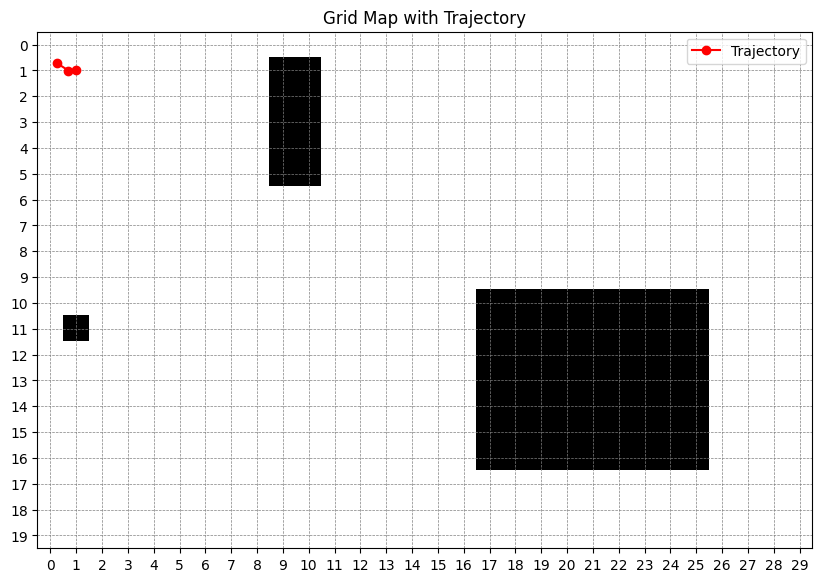

Position:  [-0.08289391361584206, 0.43451501155357325]
position 0:  -0.08289391361584206
position 1:  0.43451501155357325
Kalman update:  (-0.7104217793024327, 2.7148605101094687, -5.989984614968792)
Kalman position used:  [-0.7104217793024327, 2.7148605101094687]
x_diff:  60.710421779302436  y_diff:  57.28513948989053  distance:  83.4706087134688
my angle:  0.29320069221079414
waypoint angle:  0.7563774053058283
diff angle:  0.46317671309503416
angleDistance:  0.4631767130950344
Speed:  2.0 0.25474719220226894
Kalman prediction:  (0.0, 0.0, 0.0)
Trajectory:  [1.0, 0.7002098777964519, 0.2558241063050659, -0.08289391361584206] [1.0, 1.0097159022578934, 0.7206278560013168, 0.43451501155357325]


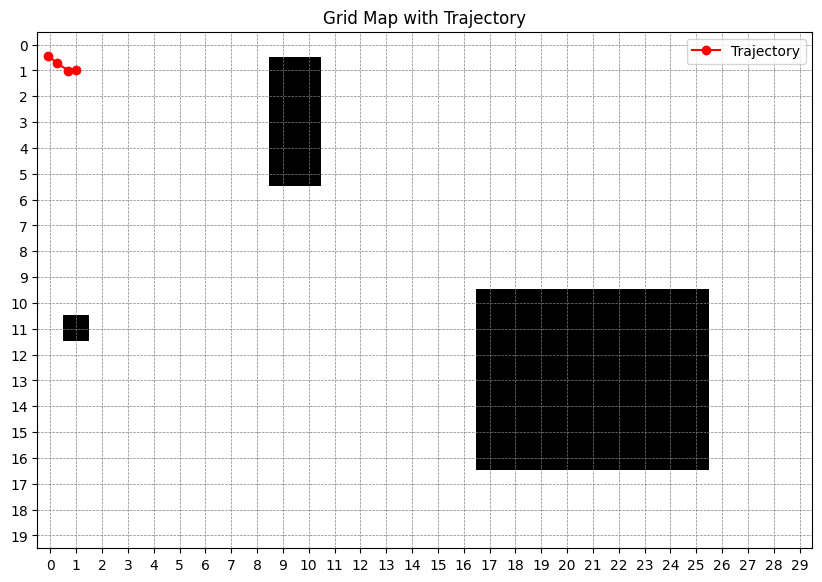

KeyboardInterrupt: 

In [18]:
x_trajectory = []
y_trajectory = []
kalman_positions = []

dt = 0.15

iter = 1

goal = False

map = matrix

# initial position and angle
position = [1, 1]
angle = 0

while not goal:
    print("Position: ", position)
    print("position 0: ", position[0])
    print("position 1: ", position[1])

    if (iter == 1):
        print("First iteration")

        thymio.set_pose(position, angle)

        print("Computing path")
        print("Map shape: ", map.shape)
        path = globalPlanning.dijkstra(map, position, (19, 28))
        thymio.set_path(path)
        plotter.set_map(map, position, (19, 28))
        plotter.plot_path(thymio.get_path_cells())
        filter.initialize_position(thymio.get_position()[0], thymio.get_position()[1], angle)
        filter.set_lastKalman_time()

    # check if camera is obstructed
    if position is not None:
        thymio.update_pose(position, angle)
        x_trajectory.append(float(position[0]))
        y_trajectory.append(float(position[1]))
        # camera measuerement that will then be used for the Kalman filter
        measurement = np.array([thymio.get_position()[0], thymio.get_position()[1], angle])
        filter.kalman_update(measurement)
        print("Kalman update: ", filter.get_state())
    
    # get the state from the Kalman filter
    # the result will depend on the mode of the filter
    x, y, angle = filter.get_state()
    kalman_position = [x, y]
    kalman_positions.append(position)
    print("Kalman position used: ", kalman_position)

    # check if the robot is detecting an obstacle
    # tmclient function to get the proximity sensors
    prox = [0, 0, 0, 0, 0]
    if (localPlanning.is_local_planning(prox)):
        # move with local planning until the robot is not back on the path
        wl, wr = localPlanning.local_planning(prox)
        v, w = thymio.inverseDifferentialDrive(wl, wr)
    else:
        # move with global planning
        v, w, wl, wr, goal = thymio.move(kalman_position, angle)

    print("Speed: ", thymio.convert_speed_cells(v), w)

    # update the Kalman filter
    filter.kalman_prediction(wl, wr)
    print("Kalman prediction: ", filter.get_state())

    # tmdclient function to move the motors
    wl = int(wl)
    wr = int(wr)

    angle = (2 * math.pi - angle) % (2 * math.pi)
    position[0] = kalman_position[0] + (v/w) * (math.sin(angle - w*dt) - math.sin(angle))
    position[0] = thymio.mm_to_cells(position[0])
    position[1] = kalman_position[1] - (v/w) * (math.cos(angle - w*dt) - math.cos(angle))
    position[1] = thymio.mm_to_cells(position[1])
    angle = (angle + w*dt) % (2 * math.pi)
    
    angle = angle - 2*math.pi
    print("Trajectory: ", x_trajectory, y_trajectory)
    plotter.plot_trajectory(x_trajectory, y_trajectory)
    
    
    # sleep for a while
    iter += 1
    time.sleep(dt+10)